In [1]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
end=dt.datetime.now()
start=dt.datetime(end.year-10,end.month,end.day)

In [49]:
Asset ='^BSESN' #change this to get returns of other assests like 'BTC-USD', '^BSESN',etc
name=yf.Ticker(Asset).info['shortName'] #to remove '^DJI' from the titile of graph

In [50]:
prices=yf.download(Asset,start,end)['Adj Close']
prices

[*********************100%%**********************]  1 of 1 completed


Date
2014-04-17    22628.839844
2014-04-21    22764.830078
2014-04-22    22758.369141
2014-04-23    22876.539062
2014-04-25    22688.070312
                  ...     
2024-04-09    74683.703125
2024-04-10    75038.148438
2024-04-12    74244.898438
2024-04-15    73399.781250
2024-04-16    72943.679688
Name: Adj Close, Length: 2452, dtype: float64

In [51]:
returns=prices.pct_change().resample('Y').agg(lambda x: (x+1).prod()-1)

df_ret =returns.reset_index()
df_ret

,Date,Adj Close
0,2014-12-31,0.215238
1,2015-12-31,-0.050251
2,2016-12-31,0.019486
3,2017-12-31,0.279060
4,2018-12-31,0.059063
5,2019-12-31,0.143766
6,2020-12-31,0.157503
7,2021-12-31,0.219941
8,2022-12-31,0.044408
9,2023-12-31,0.187367


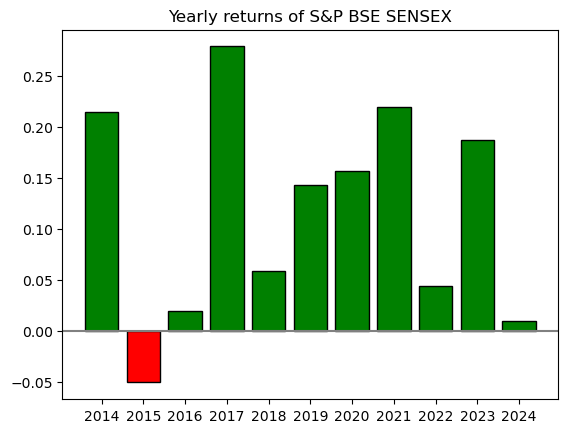

In [52]:
plt.bar(df_ret.Date.dt.year,df_ret['Adj Close'],
        color=(df_ret['Adj Close']>0).map({True:'green',False:'red'}),edgecolor='k')

plt.axhline(0,color='grey')
plt.title(f'Yearly returns of {name}')
plt.xticks(np.arange(min(df_ret.Date.dt.year),max(df_ret.Date.dt.year)+1,1))
plt.show()